### Q1. SOLUTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=100)

In [2]:
def gradient_descent(X, y, learning_rate, num_iterations):
    theta = np.random.randn(1)                            
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        predictions = np.dot(X, theta)          
        error = predictions - y                 
        gradients = (1/m) * np.dot(X.T, error)  
        theta -= learning_rate * gradients      
        cost = np.mean((error)**2)           
        cost_history.append(cost)

    return theta, cost_history

In [3]:
#ASSIGNING VALUES

In [4]:
learning_rate = 0.01
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

In [5]:
#PLOTTING

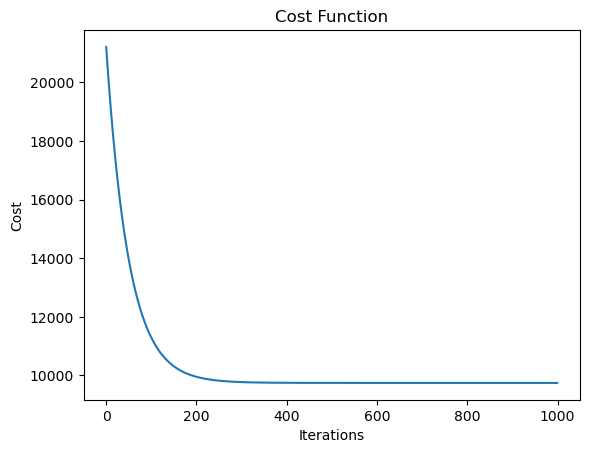

In [6]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

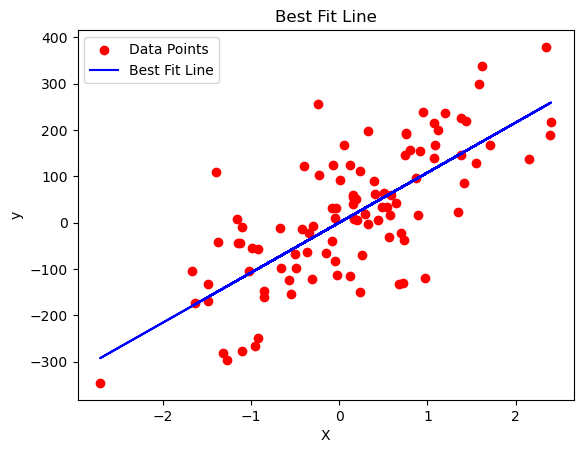

In [7]:
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

### Q2. SOLUTION

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [9]:
def sigmoid(z):    
    return 1/(1 + np.exp(-z))

In [10]:
def logistic_regression(X, y, learning_rate, num_iterations):
        theta = np.zeros((2, 1))                                                                      
        m = len(y)
        cost_history = []
        for i in range(num_iterations):
            predictions = sigmoid(np.dot(X,theta))
            error = predictions - y.reshape(100,1)
            gradients = np.dot(X.T,error)/m
            theta -= learning_rate*gradients
            cost = -(1 / m) * (np.dot(y,np.log(predictions)) + np.dot((1-y),np.log(1 - predictions)))     
            cost_history.append(cost)

        return theta, cost_history
            

In [11]:
#ASSIGNING VALUES

In [12]:
learning_rate = 0.01
num_iterations = 1000
theta , cost_history = logistic_regression(X, y, learning_rate, num_iterations)

In [13]:
#PLOTTING

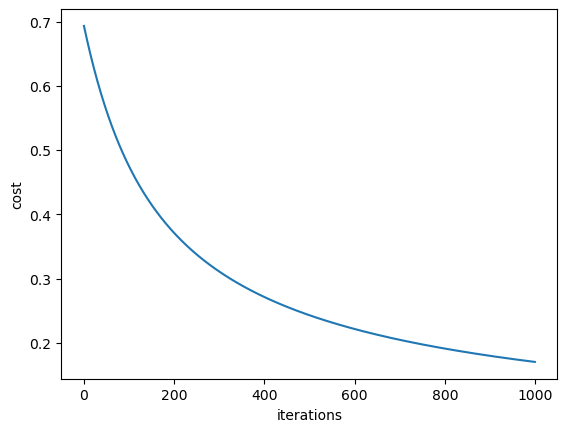

In [14]:
plt.plot(cost_history)
plt.ylabel("cost")
plt.xlabel("iterations")
plt.show()

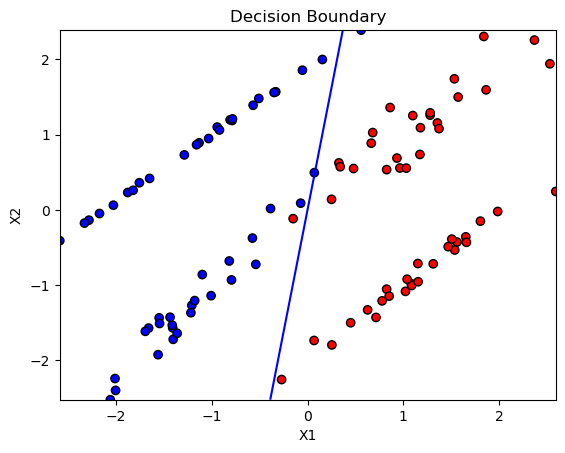

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()